# Evaluación Final - Curso "Analisis de datos interrelacionados" - 20200630


# LEER ATENTAMENTE LO SIGUIENTE ANTES DE EMPEZAR

# Consideraciones generales

*   El trabajo es extrictamente individual
*   Puede consultarse material de teórico y práctico (recordar la documnetación del API de `igraph`: https://igraph.org/python/doc/api/)
*   No se aceptan trabajos fuera de plazo


# 1. Ambiente COLAB remoto

1.   Abrir en navegador: https://colab.research.google.com/
2.   Abrir el notebook del examen:
     File-> Open Notebook -> Github -> https://github.com/prbocca/na101_master -> evaluations/exam_2022cpap.ipynb
3.   Guardar el notebook en su Google Drive:
     File -> Save a Copy in Drive... 
4.   Renombrar el archivo `"cedula ID"_exam_2022cpap.ipynb`, por ejemplo *33484022_exam_2022cpap.ipynb*  (número de cédula con guión)
5.   Al final usted deberá descargar el notebook. Asegurarse que se están guardando las salidas de ejecución en el notebook: File -> Download .ipynb
6.   Luego estos archivos deberán ser enviados a prbocca@fing.edu.uy antes del tiempo máximo de entrega






## 1.a) Cargar Librerias

In [ ]:
!pip install python-igraph > /dev/null
!pip install cairocffi > /dev/null
!pip install stellargraph > /dev/null

In [ ]:
import os
import scipy.io as sio
import igraph as ig
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from stellargraph import StellarGraph
from stellargraph import datasets
from stellargraph.data import BiasedRandomWalk

from IPython.display import display, HTML

# 2. Cargar y explorar los datos

Trabajaremos con una red que representa las relaciones mutuas de amistad en secundaria. La red fue creada a partir de una simulación, y tiene $1461$ vértices (estudiantes) y $974$ aristas unidireccionales (amistad mutua). Los vértices tienen los siguientes atributos: Grade: el grado, de 7 a 12 años; Sex: (M)asculino o (F)emenino; y Race: la raza.

Los datos originales surgen de una encuesta en dos colegios secundarios de la misma comunidad. Se completaron los datos faltantes y se unieron las dos fuentes para construir una única red (llamada aquí red original). Por razones de confidencialidad, no se dispone de la red original, sino de una red simulada.
El proceso para generar la simulación fue: (i) mapear la red original, (ii) entrenar un ERGM (*Exponential Random Graph Model*) que ajuste bien a los datos originales, (iii) usando el modelo entrenado, sortear una red simulada (con la que trabajaremos).

Fuente:
Resnick M.D., Bearman, P.S., Blum R.W. et al. (1997). Protecting adolescents from harm. Findings from the National Longitudinal Study on Adolescent Health, Journal of the American Medical Association, 278: 823-32.



## 2.a) Descargar los datos en formato GRAPHML de una red de amistades, y cargar los datos como un grafo (de igraph).

In [ ]:
# download data
!wget "https://github.com/prbocca/na101_master/raw/master/evaluations/g_magnolia.zip" -O "g_magnolia.zip"
!unzip -o g_magnolia.zip

In [ ]:
# cargar el grafo en la variable g
g = None

# Tip: usar funcion de igraph
### START CODE HERE
### END CODE HERE
print(ig.summary(g))


In [ ]:
#dibujo el grafo

def plot_amistad(graph, graphpart=None, **args):
  """ Dibujo el grafo de amistades. Permite colorear según raza o según una partición en comunudades"""

  color_map = {'F':'yellow', 'M':'blue'}
  shapes_map = {'Asian':'rectangle', 'Black':'square', 'Hisp':'rectangle', 'NatAm':'rectangle', 'Other':'rectangle', 'White':'circle'}

  random.seed(25)
  visual_style = dict()
  visual_style["layout"] = graph.layout_drl()
  visual_style["bbox"] = (400, 400)
  visual_style["vertex_size"]  = [x*0.5 for x in graph.vs["Grade"]]  
  visual_style["vertex_label"] = None
  visual_style["vertex_color"] = [color_map[x] for x in graph.vs["Sex"]]  
  visual_style["vertex_shape"] = [shapes_map[x] for x in graph.vs["Race"]]  
  visual_style["edge_color"] = 'black'
  visual_style["edge_width"] = 0.1
  if (graphpart is None):
    display(ig.plot(graph, **visual_style, **args))
  else:
    display(ig.plot(graphpart, **visual_style, mark_groups = True, **args))  
    

plot_amistad(g)

## 2.b) Quedarme con la componente gigante del grafo

En todas las siguientes secciones trabajaremos con el grafo de la componente gigante, que llamaremos `gc`.

Al finalizar, el resultado debería verse de acuerdo a la siguiente figura:

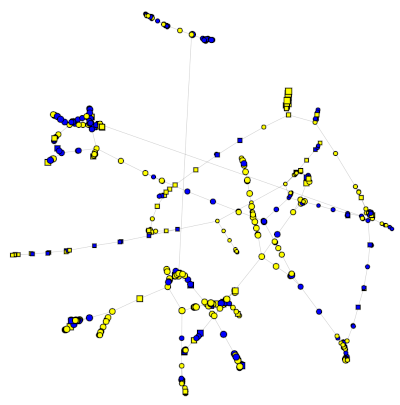

In [ ]:
# hacer la componente gigante
def giant_component(graph, **args):
  """Calcula la componente gigante de un grafo """
  cl = graph.clusters(**args)
  gc_idx = np.argmax(cl.sizes())
  gc = graph.induced_subgraph([v.index for v in graph.vs if cl.membership[v.index] == gc_idx])
  return (gc)

In [ ]:
# cargar el grafo de la componente gigante en la variable gc
gc = None

# Tip: usar funcion giant_component()
### START CODE HERE
### END CODE HERE
print(ig.summary(gc))

#dibujo el grafo
plot_amistad(gc, title="Componente gigante de relaciones secundaria")

## 2.c) Interpretar los datos

Responder a las siguientes preguntas sobre el grafo `gc`.

In [ ]:
# 2.c.1) ¿El grafo gc es dirigido?: 
### START CODE HERE
### END CODE HERE


In [ ]:
# 2.c.2) ¿Cuál es el tamaño del grafo gc?: 
### START CODE HERE
### END CODE HERE


In [ ]:
# 2.c.3) ¿Cuál es el orden del grafo gc?: 
### START CODE HERE
### END CODE HERE


In [ ]:
# 2.c.4) En el dibujo, ¿qué representa el color de los vértices?, ¿y qué representa la forma de los vértices?: 
### START CODE HERE
### END CODE HERE


## 2.d) Estudiantes con más y menos amigos en la componente gigante

Obtener la cantidad de estudiantes con menos amigos.

Obtener el nombre (atributo de vértice `name`) de los estudiantes con más amigos.

Además graficar el histograma de la distribución de grafo.

Nota: TODOS LOS CALCULOS EN LA COMPONENTE GIGANTE

In [ ]:
# cantidad de estudiantes con menos amigos

print("Los estudiantes con menos amigos tienen solo " + str(min(gc.degree())) + " amigo.")

cant_menosamigos = None #cantidad de estudiantes con menos amigos
### START CODE HERE
### END CODE HERE
print("La cantidad de estudiantes que tienen menos amigos son: " + str(cant_menosamigos))

In [ ]:
# estudiantes con mas amigos

name_masamigos = None #vector de nombres de estudiantes con mas amigos
cant_masamigos = None #cantidad de estudiantes con mas amigos
### START CODE HERE
### END CODE HERE
print("Los nombres de los estudiantes que tienen mas amigos son: " + str(name_masamigos))
print("La cantidad de estudiantes que tienen mas amigos son: " + str(cant_masamigos))

In [ ]:
# histograma de distribución de grado

### START CODE HERE
### END CODE HERE


In [ ]:
# 2.d.1) Viendo el histograma, ¿Cuál es la cantidad de amigos más frecuente entre estudiantes?:
### START CODE HERE
### END CODE HERE


## 2.e) Responder algunas preguntas teóricas relacionadas a este tema


In [ ]:
# 2.e.1) ¿Cuáles son las 4 categorías generales en las que se clasifican las redes reales?
### START CODE HERE
### END CODE HERE


In [ ]:
# 2.e.2) ¿Qué es el 'orden' de un grafo?
### START CODE HERE
### END CODE HERE


In [ ]:
# 2.e.3) ¿Las redes reales son típicamente densas o dispersas?
### START CODE HERE
### END CODE HERE


In [ ]:
# 2.e.4) ¿Qué es la componente gigante de una red?
### START CODE HERE
### END CODE HERE


In [ ]:
# 2.e.5) ¿Típicamente los hipergrafos se representan como un grafo de qué tipo?
### START CODE HERE
### END CODE HERE


# 3. Centralidad de vértices

Estudiar cuales son los estudiantes más importantes en el grafo `gc`...

Utilizando el paquete `igraph` calcular las métricas de centralidad: `degree(), closeness(), betweenness(), evcent(), page.rank()`, 
y comparar los tres usuarios con mayor centralidad para cada una de ellas.


## 3.a) Obtener las centralidades de los tres estudiantes más importantes

Nota: puede responderse con los indices de los vértices o con los nombres

In [ ]:
# calcular centralidades y imprimir los 3 estudiantes más importantes para cada una de ellas

### START CODE HERE
### END CODE HERE


## 3.b) Responder algunas preguntas teóricas relacionadas a este tema

In [ ]:
# 3.b.1) Si la ponderación (pesos) de un grafo presenta errores de medida, ¿cuál es la centralidad que esperamos más se afecte por esos errores?
### START CODE HERE
### END CODE HERE


In [ ]:
# 3.b.2) ¿Qué problema resuelve la centralidad Page-Rank si la comparamos con la centralidad de vector propio?
### START CODE HERE
### END CODE HERE


In [ ]:
# 3.b.3) ¿Cuál es el nombre (o la sigla) de la centralidad que ofrece un valor de autoridad y otro de hub?
### START CODE HERE
### END CODE HERE


# 4. Detección de comunidades

Buscaremos particionar el grafo `gc` de acuerdo a su estructura, es decir detectaremos sus comunidades.

## 4.a) Particionado goloso

La librería `igraph` ofrece varios métodos para detectar comunidades. 
Uno de ellos es el particionado goloso rápido (clustering jerárquico aglomerativo) visto en clase.

Realizar el particionado goloso rápido en varias comunidades usando las funciones de `igraph`: `community_fastgreedy()` y `as_clustering()`.


In [ ]:
#  realizar el particionado golozo
random.seed(10)

gc_fg_dendrogram = gc.community_fastgreedy()
gc_fg_clusters = gc_fg_dendrogram.as_clustering()
print("Cantidad de comunidades encontradas: " + str(len(gc_fg_clusters)))
print("La mayoría de las comunidades son muy pequeñas:")
display(gc_fg_clusters.sizes())

#dibujo el grafo
plot_amistad(gc, gc_fg_clusters)

Dado que el método de particionado es jerárquico es posible definir la cantidad de comunidades que se quiere. Utilizando el cálculo anterior, particionaremos solo en dos comunidades.

In [ ]:
#  cortar el dendograma en 2 clusters
gc_fg_clusters2 = gc_fg_dendrogram.as_clustering(n=2)
print("Cantidad de comunidades encontradas: " + str(len(gc_fg_clusters2)))
print("dos grandes comunidades:")
display(gc_fg_clusters2.sizes())

#dibujo el grafo
plot_amistad(gc, gc_fg_clusters2)

## 4.b) Particionado usando el espacio embebido: Laplacian Eigenmap

### 4.b.1) Laplacian Eigenmap
Una de las formas más simples y eficaces de embember los vértices de un grafo en un espacio vectorial se conoce como `Laplacian Eigenmap`. 

Este método es un caso muy sencillo de embebido superficial que sigue el framework `encoder-decoder`. 
* Al ser superficial, el `encoder` es una función de mapeo (tabla): $ENC(u)=\mathbf{Z}[u]$, donde $\mathbf{Z} \in \mathbb{R}^{|V| \times d}$, 
* y el `decoder` es la función de parejas de vectores de vértices definida:
$$ DEC(\mathbf{Z}[u], \mathbf{Z}[v]) = || \mathbf{Z}[u] - \mathbf{Z}[v] ||_2^2.$$

Cuando se entrena el espacio embebido para que la similaridad entre los vectores sea la matriz laplaciana, se puede demostrar (ver teórico) que este método de embebido corresponde a elegir $\mathbf{Z} \sim$ los $d$ vectores propios de $L$ de valor propio más pequeño, exceptuando el valor propio 0.

Aplicaremos este resultado entonces:
* 1) Primero, empezamos por construir el laplaciano del grafo: $ L = D - A$. Esto es bastante sencillo de hacer con `igraph`.

* 2) Luego, tenemos que calcular los valores y vectores propios del laplaciano. Esto también es fácil de hacer usando `numpy`.

* 3) Vamos a necesitar los vectores propios ordenados de menos a mayor.

* 4) En el espacio de vectores propios, a cada vértice le corresponde un vector de tamaño $N$ (donde $N$ son la cantidad de nodos en el grafo). Luego, para embeber los vértices en un espacio de dimensión $d$ vamos a quedarnos con las $d$ coordenadas de cada nodo asociadas a los valores propios más chicos (sin contar el más chico de todos, ese lo ignoramos). Veamos como ejemplo sencillo $d=3$.

In [ ]:
#1)
# construimos la matriz laplaciana de gc
L = None
### START CODE HERE
### END CODE HERE

#2)
eig_val, eig_vec = np.linalg.eig(L)

#3)
idx = eig_val.argsort()
eig_val = eig_val[idx]
eig_vec = eig_vec[:, idx]
print("Los valores propios son:\n", eig_val.shape)
print("Los vectores propios estan en una matriz NxN:\n", eig_vec.shape)

#4)
d = 3
encoder_laplacian_eigenmap = eig_vec[:, 1: 1 + d] # El eje 0 es la cantidad de nodos y el eje 1 es la dimensión
print("El embebido superficial tiene dimensiones ", encoder_laplacian_eigenmap.shape)

### 4.b.2) K-Mean sobre el espacio embebido

Utilizando el espacio embebido apliquemos un K-Mean para detectar las comunidades.

Esperamos obtener una partición parecida a la obtenida con el particinoado goloso:

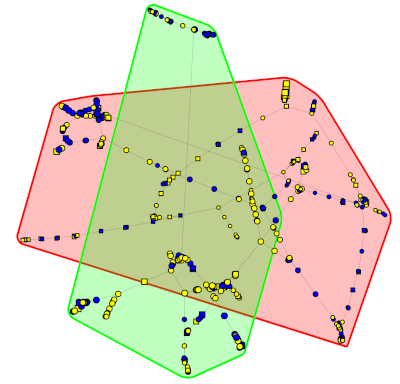

In [ ]:
#aplico kmeans y obtengo la comunidad de cada vertice
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
gc_km_membership = km.fit_predict(encoder_laplacian_eigenmap)
display(gc_km_membership)

#convierto los membership a un objeto de cluster para graficar
gc_km_clusters = ig.VertexClustering(gc, membership=gc_km_membership)
plot_amistad(gc, gc_km_clusters)

Nos gustaría evaluar si este espacio embebido puede ser útil para clasificar el atributo `Sex`. Para eso decidimos graficarlo usando t-distributed stochastic neighbor embedding (t-SNE), esperando que aparezcan clusters según el sexo.

In [ ]:
print("Usaremos el embebido superficial calculado antes: ", encoder_laplacian_eigenmap.shape)

node_targets_laplacian_eigenmap = pd.Series(gc.vs["Sex"]).astype("category")
print("Y pintaremos según la variable categorica del sexo: ", node_targets_laplacian_eigenmap.head())

# Graficar estos puntos, usando tSNE, reduciendo el espacio embebido a dos dimensiones, y pintando según el grado.
### START CODE HERE
### END CODE HERE


In [ ]:
# ¿Los sexos se separan en la gráfica tSNE? ¿El embebido será muy útil para clasificar el sexo?
### START CODE HERE
### END CODE HERE


## 4.c) Responder algunas preguntas teóricas relacionadas a este tema

In [ ]:
# 4.c.1) Existen muchas definiciones para subgrupo cohesivo en un grafo, la mayoría se basan en relajar el concepto de:...
### START CODE HERE
### END CODE HERE


In [ ]:
# 4.c.2) Si en una red social tenemos una ponderación de fortaleza en las aristas, esperamos encontrar los vínculos débiles en las aristas puente?
### START CODE HERE
### END CODE HERE


In [ ]:
# 4.c.3) El particionado espectral se basa en maximizar la:... 
### START CODE HERE
### END CODE HERE


# 5. Predicción de información faltante en una subred de la componente gigante

Estudiaremos que tan predictiva es la información de red. 
Primero estudiaremos la homofilia y mezcla selectiva en la red, y luego estudiaremos la predicción de atributos de vértices.

## 5.a) Homofilia y mezcla selectiva

In [ ]:
def mezcla_selectiva(graph, attr):
  """ funcion que acumula los atributos de los vertices incientes a todas las aristas"""
  v = graph.get_vertex_dataframe()[attr]
  attr_uniques = sorted(v.unique())
  ms = pd.DataFrame(np.zeros((len(attr_uniques),len(attr_uniques))), index=attr_uniques, columns=attr_uniques).astype(int)
  el = graph.get_edgelist()
  for e in el:
    i = graph.vs[e[0]][attr]
    j = graph.vs[e[1]][attr]

    if graph.is_directed():
      ms.loc[i,j] = ms.loc[i,j] + 1
    else:
      if i<j:
        ms.loc[i,j] = ms.loc[i,j] + 1
      else:
        ms.loc[j,i] = ms.loc[j,i] + 1

  return(ms)

ms_Sex = mezcla_selectiva(gc, "Sex")
print("La matriz de mezcla selectiva según Sex es:")
display(ms_Sex)

Calcular la matriz de mezcla selectiva para los atributos `Grade` y `Race`.

In [ ]:
ms_Grade = None
ms_Race = None
### START CODE HERE
### END CODE HERE
print("La matriz de mezcla selectiva según Grade es:")
display(ms_Grade)
print("La matriz de mezcla selectiva según Race es:")
display(ms_Race)

In [ ]:
# 5.a.1) Dar opinión: ¿qué variable (Sex/Grade/Race) parece mostrar más homofilia positiva?
### START CODE HERE
### END CODE HERE


## 5.b) Predicción de atributos de vértices en la componente gigante de la red de amistad

Un método sencillo para predecir los atributos faltantes es el método de los vecinos más cercanos (*NNM - nearest-neighbor method*), donde se estima el atributo faltante en el vértice $i$ como el promedio de los atributos en el vecindario de $i$. La idea de vecindario y promedio puede variar dependiendo del caso particular. Este método suele funcionar bien cuando existe una marcada homofilia entre los vértices participantes respecto a ese atributo.


Aquí evaluaremos la precisión del método NNM, sobre una subred observada donde conocemos solo 300 atributos de vértice `Sex` de la red `gc`. Y evaluaremos la predicción sobre el resto.
El atributo `Sex`, disponible en la red, es una variable categórica. Por tal motivo, el promedio sobre los vecinos del método NNM se define como el enumerado de mayor frecuencia. Para otros atributos numéricos podemos utilizar el promedio.
Para medir la calidad de predicción del método usaremos la exactitud  (*accuracy* - fracción de predicciones correctas).





 Elegimos el conjunto de train con 300 vértices al azar. Serán los vértices de los que conocemos el atributo a predecir. Y evaluaremos la calidad del método con la predicción en los restantes vértices.

In [ ]:
r = np.random.RandomState(5434)

train_index = None #Arreglo Numpy con un listado al azar de 200 identificadores de vértices
# Tip: ejemplo de práctico
### START CODE HERE
### END CODE HERE

display(train_index)

Tenemos las siguientes funciones que calculan el NNM.

In [ ]:
def nnm_node(graph, node, attr="label", fun="freq", known_index=None, default_attr=None):
  """ Calculo el NNM para el nodo"""

  if known_index is None:
    known_index = [v.index for v in graph.vs]

  neigbs = graph.neighborhood(order=1, vertices=node, mindist=1)
  known_neigbs = [n for n in neigbs if n in known_index]
  known_attrs = [v[attr] for v in graph.vs if v.index in known_neigbs]
  if len(known_attrs)==0:
    return(default_attr)

  if (fun=="mean"):
    return(np.mean(known_attrs))
  elif (fun=="freq"):
    return(max(set(known_attrs), key = known_attrs.count))


def nnm(graph, attr="label", fun="freq", known_index=None, default_attr=None):
  """ Calcula el NNM para todos los vertices de graph, para el atributo attr, usando la funcion de agregacion fun sobre el conjunto de vertices known_index. 
  Si no hay vecinos que cumplan criterio retornoa default_attr"""

  result_lt = []
  for v in graph.vs:
    result_lt.append(nnm_node(graph, v.index, attr, fun, known_index, default_attr))
  return(result_lt)


Aplicamos NNM para el atributo `Sex`.

In [ ]:
predicted_nnm = nnm(gc, attr="Sex", fun="freq", known_index=train_index, default_attr='NA')
node_targets_nnm = pd.Series(gc.vs["Sex"]).astype("category")

df_nnm = pd.DataFrame({'target':node_targets_nnm, 'pred':predicted_nnm})
acc = accuracy_score(df_nnm.loc[~df_nnm.index.isin(train_index), 'target'], df_nnm.loc[~df_nnm.index.isin(train_index), 'pred'])
print(f"Model NNM for attribute Sex has an accuracy of {acc:0.4f}")


In [ ]:
# 5.b.1) ¿Qué se puede concluir sobre la homofilia de 'Sex' en esta red de amistad?
### START CODE HERE
### END CODE HERE


Ahora aplicamos NNM para el atributo `Grade`. Usar como función de agregación `freq` y atributo por defecto $0$ (numérico).

In [ ]:

predicted_nnm = None #lista ordenada donde se guarda el atributo predicho para todos los vertices
### START CODE HERE
### END CODE HERE

node_targets_nnm = pd.Series(gc.vs["Grade"]).astype("category")

df_nnm = pd.DataFrame({'target':node_targets_nnm, 'pred':predicted_nnm})
acc = accuracy_score(df_nnm.loc[~df_nnm.index.isin(train_index), 'target'], df_nnm.loc[~df_nnm.index.isin(train_index), 'pred'])
print(f"Model NNM for attribute Grade has an accuracy of {acc:0.4f}")

Ahora buscaremos predecir el atributo usando un espacio embebido Laplacian Eigenmap, similar a 4.b.1), pero de dimensión $d=32$.

Primero calculamos el espacio embebido.

In [ ]:

eig_vec = None #vectores propios ordenados
# Tip: ver parte 4.b.1
### START CODE HERE
### END CODE HERE

#4)
d = 32
encoder_laplacian_eigenmap = eig_vec[:, 1: 1 + d] # El eje 0 es la cantidad de nodos y el eje 1 es la dimensión
print("El embebido superficial tiene dimensiones ", encoder_laplacian_eigenmap.shape)

node_targets_laplacian_eigenmap = pd.Series(gc.vs["Grade"]).astype("category")

Ahora vamos a predecir la categoría de los vértices usando una regresión logística.

Lo que vamos a hacer aquí es para cada dataset, separar el conjunto de train y test para luego entrenar una regresión.

In [ ]:
df_laplacian = pd.DataFrame(encoder_laplacian_eigenmap)
df_laplacian['target']= pd.Categorical(node_targets_laplacian_eigenmap)

train_df = df_laplacian[df_laplacian.index.isin(train_index)]
test_df = df_laplacian[~df_laplacian.index.isin(train_index)]
y_train = train_df.pop("target")
y_test = test_df.pop("target")

log_reg = LogisticRegressionCV(Cs=10,
                              cv=10,
                              tol=0.001,
                              max_iter=1000,
                              scoring="accuracy",
                              verbose=False,
                              multi_class="ovr",
                              random_state=r)
log_reg.fit(train_df, y_train)
predicted = log_reg.predict(test_df)

acc = accuracy_score(y_test, predicted)
print(f"Model Laplacian Eigenmap has an accuracy of {acc:0.4f}")

In [ ]:
# 5.b.1) ¿El método NNM mostró que existe predictibilidad del grado de un estudiante en la red?
### START CODE HERE
### END CODE HERE


In [ ]:
# 5.b.2) ¿El espacio embebido resultó util para predecir el grado de un estudiante?
### START CODE HERE
### END CODE HERE


## 5.c) Responder algunas preguntas teóricas relacionadas a este tema

In [ ]:
# 5.c.1) Típicamente las distribuciones de grado de las redes reales siguen una distribución:.... 
### START CODE HERE
### END CODE HERE


In [ ]:
# 5.c.2) ¿Qué conviene graficar para ver la distribución de grado de una gran red real: el histograma o la CCDF?: CCDF
### START CODE HERE
### END CODE HERE
